 # Objective
 
    Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
    measurements. Now assume that you have the measurements of the iris flowers according to
    their species, and here your task is to train a machine learning model that can learn from the
    measurements of the iris species and classify them.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
import pandas as pd
new = pd.read_csv (r"C:\Users\Dell\Desktop\Machine Learning\oasis\iris.csv")

#first few rows
new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
new.shape

(150, 6)

In [5]:
new.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

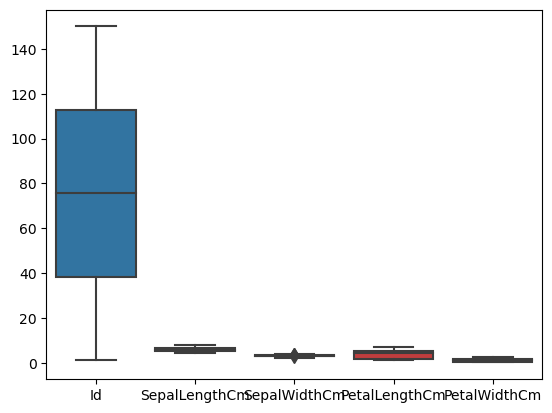

In [6]:
sns.boxplot(data=new)

### Winsorizing Technique -- Treatment of Outlier

In [7]:
q1 = new['SepalWidthCm'].quantile(0.25)
q3 = new['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
low_limit

2.05

In [8]:
new['SepalWidthCm']=np.where(new['SepalWidthCm'] > upper_limit,upper_limit,new['SepalWidthCm']) # upper limit
new['SepalWidthCm']=np.where(new['SepalWidthCm'] < low_limit,low_limit,new['SepalWidthCm']) # upper limit

<AxesSubplot:>

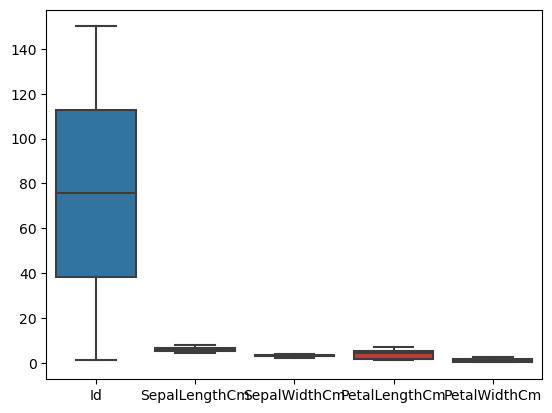

In [9]:
sns.boxplot(data=new)

# Data Visualisation

In [10]:
import plotly.express as px

fig = px.pie(new,names='Species',
             color_discrete_map={'Iris-setosa':'Blue',
                                 'Iris-versicolor':'red',
                                'Iris-virginica':'green'})
fig.show()

* The data is equally balanced in each class of target variable

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

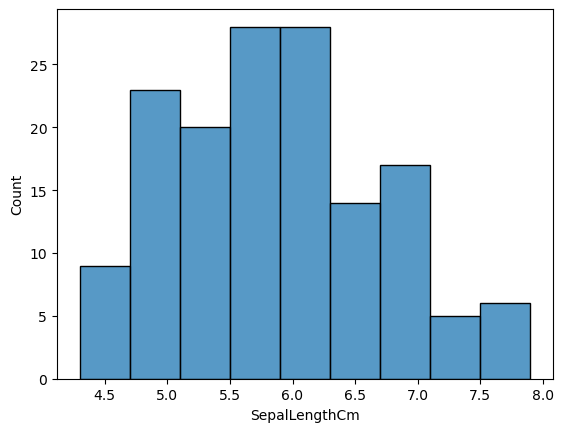

In [11]:
sns.histplot(x='SepalLengthCm',data=new)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

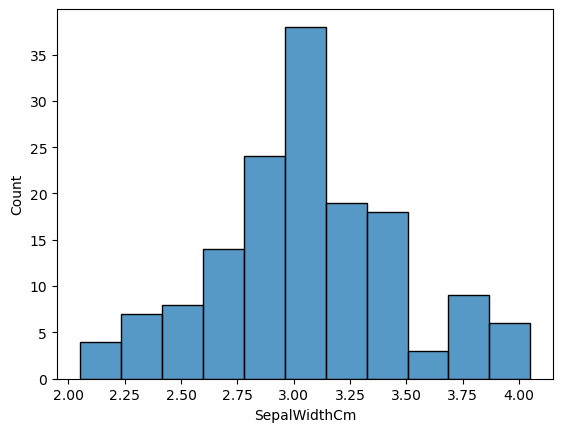

In [12]:
sns.histplot(x='SepalWidthCm',data=new)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

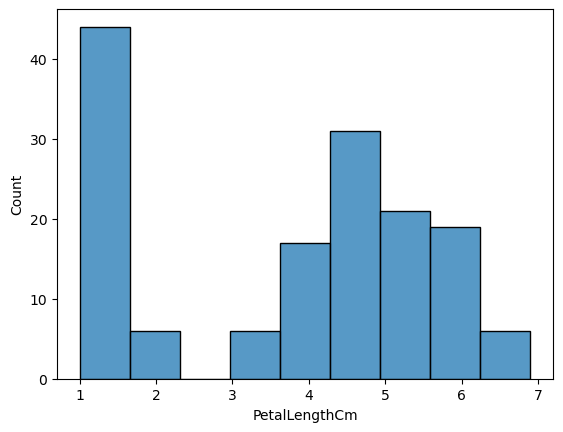

In [13]:
sns.histplot(x='PetalLengthCm',data=new)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

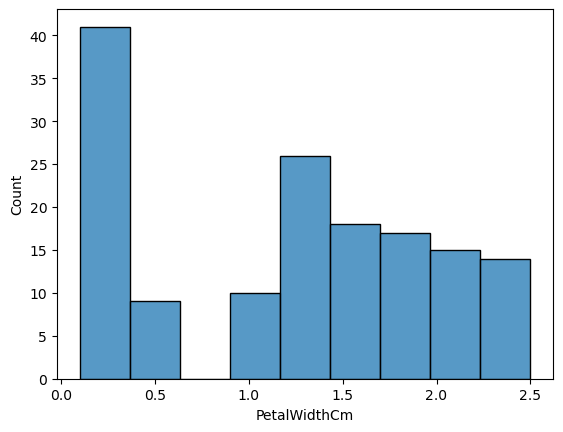

In [14]:
sns.histplot(x='PetalWidthCm',data=new)

* All the numerical columns follow normally distributed curve.

In [15]:
# Qualitative Variable
Quantitative_Variable = new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2


In [16]:
Qualitative_Variable = new[new.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [17]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Combining the data set 

In [18]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,1,5.1,3.5,1.4,0.2
1,0,2,4.9,3.0,1.4,0.2
2,0,3,4.7,3.2,1.3,0.2
3,0,4,4.6,3.1,1.5,0.2
4,0,5,5.0,3.6,1.4,0.2


# Data Partition 

In [19]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Species', axis = 1)
Y = Final_combined[['Species']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model building

# Hypothesis

* H0 :- There is no log linear relationship between dependent and all independent Variable

Vs 

* H1 :- There is log linear relationship between dependent and all independent Variable

Alpha = 0.05 (5%)

# Logistics Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [21]:
output.intercept_  # beto 

array([  9.38780117,  12.12750196, -21.51530313])

In [22]:
output.coef_  # Beta 1 -- 

array([[-0.13106724,  0.55787607,  1.09069907, -1.31936468, -0.62406548],
       [-0.06781287, -0.32409037, -1.00554908,  0.48164071, -0.23280949],
       [ 0.19888012, -0.2337857 , -0.08514999,  0.83772398,  0.85687497]])

In [23]:
output.feature_names_in_

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [24]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
112,113,6.8,3.0,5.5,2.1,2
101,102,5.8,2.7,5.1,1.9,2
72,73,6.3,2.5,4.9,1.5,1
40,41,5.0,3.5,1.3,0.3,0
38,39,4.4,3.0,1.3,0.2,0


train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

In [25]:
train['Predicted']=output.predict(X_train)
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
112,113,6.8,3.0,5.5,2.1,2,2
101,102,5.8,2.7,5.1,1.9,2,2
72,73,6.3,2.5,4.9,1.5,1,1
40,41,5.0,3.5,1.3,0.3,0,0
38,39,4.4,3.0,1.3,0.2,0,0


# Step 7 : Model Performance Metrics

In [26]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Species'])
matrix

array([[40,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 40]], dtype=int64)

In [27]:
Accuracy_Train=((40+40+40)/(120)*100)
print(Accuracy_Train)

100.0


* Accuracy of Model is 100% , So we say Model good fit data  

In [28]:
from sklearn.metrics import classification_report
print(classification_report(train['Species'],train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



* Accuracy of  Model is 100%,Hence Model is good Fit 

# Step 8 : Predictions on Test Dataset

In [29]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
137,138,6.4,3.1,5.5,1.8,2
98,99,5.1,2.5,3.0,1.1,1
77,78,6.7,3.0,5.0,1.7,1
141,142,6.9,3.1,5.1,2.3,2
120,121,6.9,3.2,5.7,2.3,2


In [30]:
test['Predicted']=output.predict(X_test)
test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
137,138,6.4,3.1,5.5,1.8,2,2
98,99,5.1,2.5,3.0,1.1,1,1
77,78,6.7,3.0,5.0,1.7,1,1
141,142,6.9,3.1,5.1,2.3,2,2
120,121,6.9,3.2,5.7,2.3,2,2


# Step 9 : Model Performance Metrics on Test data 

In [31]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Species'])
print(matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [32]:
Accuracy_test=((10+10+10)/(30)*100)
Accuracy_test

100.0

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test['Species'],test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



* Accuracy of  Model is 100%,Hence Model is good Fit 


# Conclusion:
   * Accuracy of the model is 100% so its good fit model
   * Due to less Dataset in Iris Dataset we got 100% Accuracy